# What is GB and XGB ?
* XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 


* XGBoost is an implementation of gradient boosted decision trees designed for speed and performance



* Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.



* Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.



* This approach supports both regression and classification predictive modeling problems.


## Decision tree,Bagging,Random forest,Boosting,Gradient Boosting,XGBoost
![](xgbt.png)


**Why does XGBoost perform so well?**
* XGBoost and Gradient Boosting Machines  are both ensemble tree methods that apply the principle of boosting weak           learners using the gradient descent architecture. However, XGBoost improves upon the base GBM frameworkthrough systems optimization and algorithmic enhancements.


#### 1.Regularization: 
* This is considered to be as a dominant factor of the algorithm. Regularization is a technique that is used to get rid of overfitting of the model. 

#### 2.Cross-Validation: 
* We use cross-validation by importing the function from sklearn but XGboost is enabled with inbuilt CV function.

#### 3.Missing Value:  
* It is designed in such a way that it can handle missing values. It finds out the trends in the missing values and apprehends them.

#### 4.Flexibility:
* It gives the support to objective functions. They are the function used to evaluate the performance of the model and also it can handle the user-defined validation metrics.



## System Optimization

#### Parallelization:
* XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners. 
- the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. 
- Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads. This switch improves algorithmic performance by offsetting any parallelization overheads in computation.

##### **SIMPLER EXPLANATION OF THE ABOVE:**
XGBoost is a method for building decision trees in a smarter and faster way. Normally, when you're building a tree, you have to do one step at a time, like first figuring out the branches and then deciding what goes at the ends of those branches. This can take a lot of time because you have to finish one step before starting the next.

But XGBoost is clever. It figures out a way to do these steps at the same time, which speeds things up a lot. It does this by rearranging how it does things. Instead of waiting for one step to finish before starting the next, it looks ahead and starts preparing for the next step while it's still working on the current one.

Imagine you're building a tree. Normally, you'd have to finish placing all the branches before you can put any leaves on them. But with XGBoost, you can start preparing the leaves while you're still working on the branches. This makes the whole process faster because you're not waiting around for one step to finish before starting the next one.

To make this work even better, XGBoost uses multiple threads to do things at the same time, sort of like having multiple workers on the job. By rearranging the steps and using these multiple threads, XGBoost can build trees much faster than traditional methods.


#### Tree Pruning: 
- The stopping criterion for tree splitting within GBM framework is greedy in nature and depends on the negative loss criterion at the point of split.
- XGBoost uses ‘max_depth’ parameter as specified instead of criterion first, and starts pruning trees backward. This ‘depth-first’ approach improves computational performance significantly.


#### Hardware Optimization:
* This algorithm has been designed to make efficient use of hardware resources. 
- This is accomplished by cache awareness by allocating internal buffers in each thread to store gradient statistics. 
- Further enhancements such as ‘out-of-core’ computing optimize available disk space while handling big data-frames that do not fit into memory.









**When to Use XGBoost?**

* 1> When you have large number of observations in training data.**

* 2> Number features < number of observations in training data.**

* 3> It performs well when data has mixture numerical and categorical features or just numeric features.**

* 4> When the model performance metrics are to be considered.**

## Problem statement 

To predict the heart disease on the patients based on the given input features.

## Importing the libraries

In [1]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset 

In [2]:
##loading the dataset
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##  Domain analysis

The data predicts the heart disease as the target variable based on the independent features such as age, sex, chestpaintype, 
restingBP, Cholestrol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak and ST_Slope.

#### DESCRIPTION OF CERTAIN TERMS:

##### restingBP: 
- the blood pressure of the individual at rest. Elevated restingBP can be an indicator of cardiovascular risk.

##### FastingBS:
- Blood sugar level after fasting for a certain period. Elevated fasting blood sugar levels may be associated with diabetes, and risk factor for heart disease.

##### RestingECG:
- Electrocardiogram results at rest, which may include features like ST-T wave abnormalities and indicators of abnormal heart rhythms.

##### MaxHR:
- Maximum Heart Rate - The highest heart rate achieved during exercise. It is used to asess cardiovascular fitness and stress response.

##### ExerciseAngina:
- Level of physical activity or exercise. Regular exercise is associated with better cardiovascular health.

##### Old peak: 
- also known as depression of the ST segment on the ECG during exercise. It shows how much the ST segment deviates during physical activity. ST depression can be an indicator of insufficient blood supply to the heart.
        Hence higher value of old peak denotes higher risk of coronary artery disease.
        
##### ST slope (Slope of the ST Segment During Exercise):
- It describes the direction and steepness of the ST segment deviation from the baseline during physical activity.
##### **Significance:** 
The slope of the ST segment can provide additional information about the nature of cardiac abnormalities. 
          A positive slope may indicate an upward deviation, while a negative slope may suggest a downward deviation.
       
#### These features can be categorized under the following factors:       
    
- 1. Demographic information:
    This includes age and sex here.
- 2. Clinical Measurements:
    This covers chest pain type, resting BP, cholestrol and FastingBS.
- 3. Electrocardiogram (ECG) Measurements:
    This includes RestingECG
- 4. Exercise related factors:
    MaxHR
- 5. Lifestyle factors:
    Exercise Angina- Level of physical activity or exercise.

# Basic checks

In [3]:
data.head()#first five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
data.shape

(918, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# no null values

In [8]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
# no constant feature in numerical columns

In [10]:
data.describe(include= 'O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [11]:
data.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [12]:
data.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [13]:
data.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [14]:
data.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [15]:
data.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [16]:
data.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

### Univariate Analysis

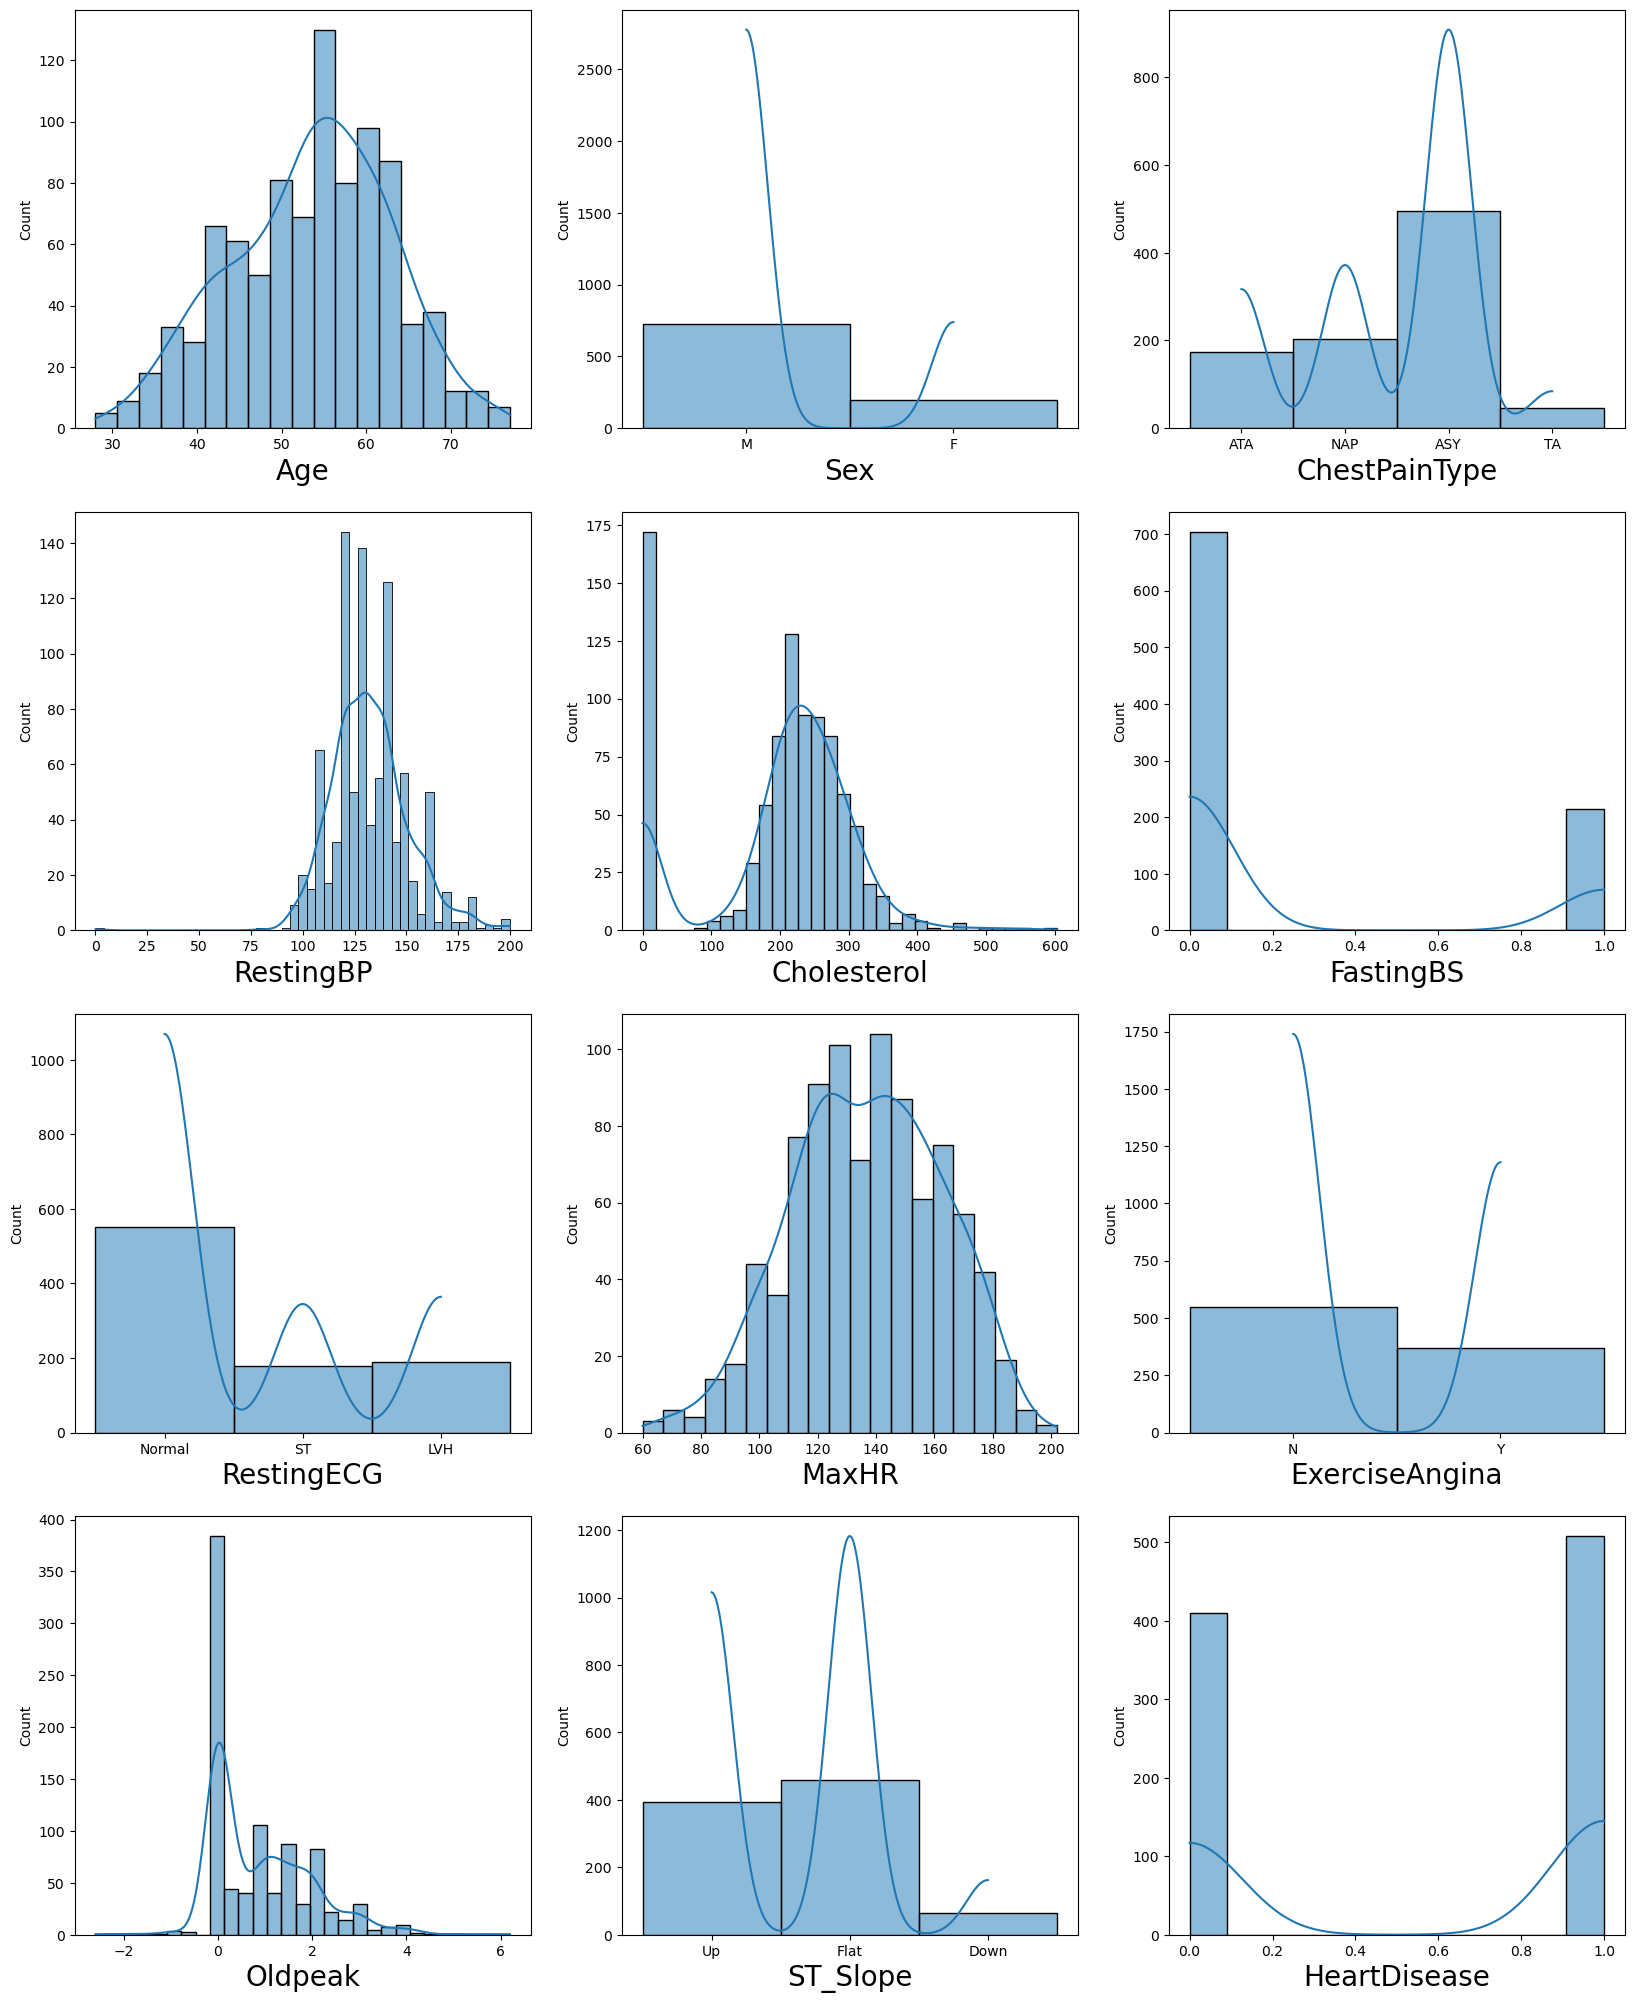

In [17]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to be plotted in canvas 


for column in data.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)# plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column], kde= True) # it gives frequency hue =value counts
        plt.xlabel(column,fontsize=20) # assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

In [18]:
data1= data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]
data1

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,Normal,N,Up,0
1,F,NAP,Normal,N,Flat,1
2,M,ATA,ST,N,Up,0
3,F,ASY,Normal,Y,Flat,1
4,M,NAP,Normal,N,Up,0
...,...,...,...,...,...,...
913,M,TA,Normal,N,Flat,1
914,M,ASY,Normal,N,Flat,1
915,M,ASY,Normal,Y,Flat,1
916,F,ATA,LVH,N,Flat,1


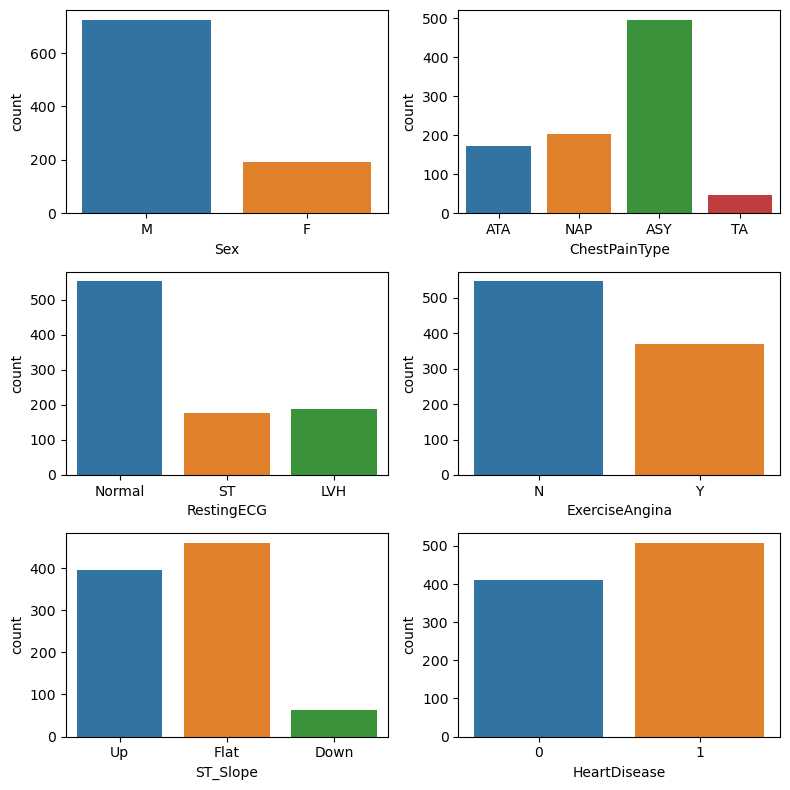

In [19]:
plt.figure(figsize= (8, 8), facecolor = 'white')
plotnum= 1

for column in data1:
    if plotnum <=6:
        ax= plt.subplot(3,2, plotnum)
        sns.countplot(data= data, x= column)
        plt.xlabel(column, fontsize= 10)
        plt.ylabel('count', fontsize= 10)
    plotnum +=1
plt.tight_layout()

###  Insights:
- Betweeen 40 to 65 years of age, people have more probability of attaining heart disease.
- Around 25% people are female patients in the dataset compared to male.
- ChestPainType of ASY has the topmost frequently occured type followed by NAP.
- Around 70% of people has 0 FastingBS and the remaining 30% constitute 1.
- RestingECG has the dominant population of normal type followed by ST and LVH.
- flat is the majorly occured ST_slope.
- Heart disease confirmed patients constitute more than half of the population.

In [20]:
data.Age.skew() # fairly symmetrical

-0.19593302867569365

In [21]:
data.RestingBP.skew() # fairly symmetrical

0.1798393100516288

In [22]:
data.Cholesterol.skew() # moderately skewed

-0.6100864307268192

In [23]:
data.MaxHR.skew() #fairly symmetrical

-0.14435941846180994

In [24]:
data.Oldpeak.skew() #highly skewed

1.0228720218107528

#### Insights:
- Age, RestingBP, MaxHR are the features in normal distribution,  Cholesterol is moderately skewed, oldpeak is highly skewed.
- Sex, Chestpain type, RestingECG, ExerciseAngina, ST_slope are the categorical features.
- FastingBS and heart disease are the discrete features.

### Bivariate Analysis

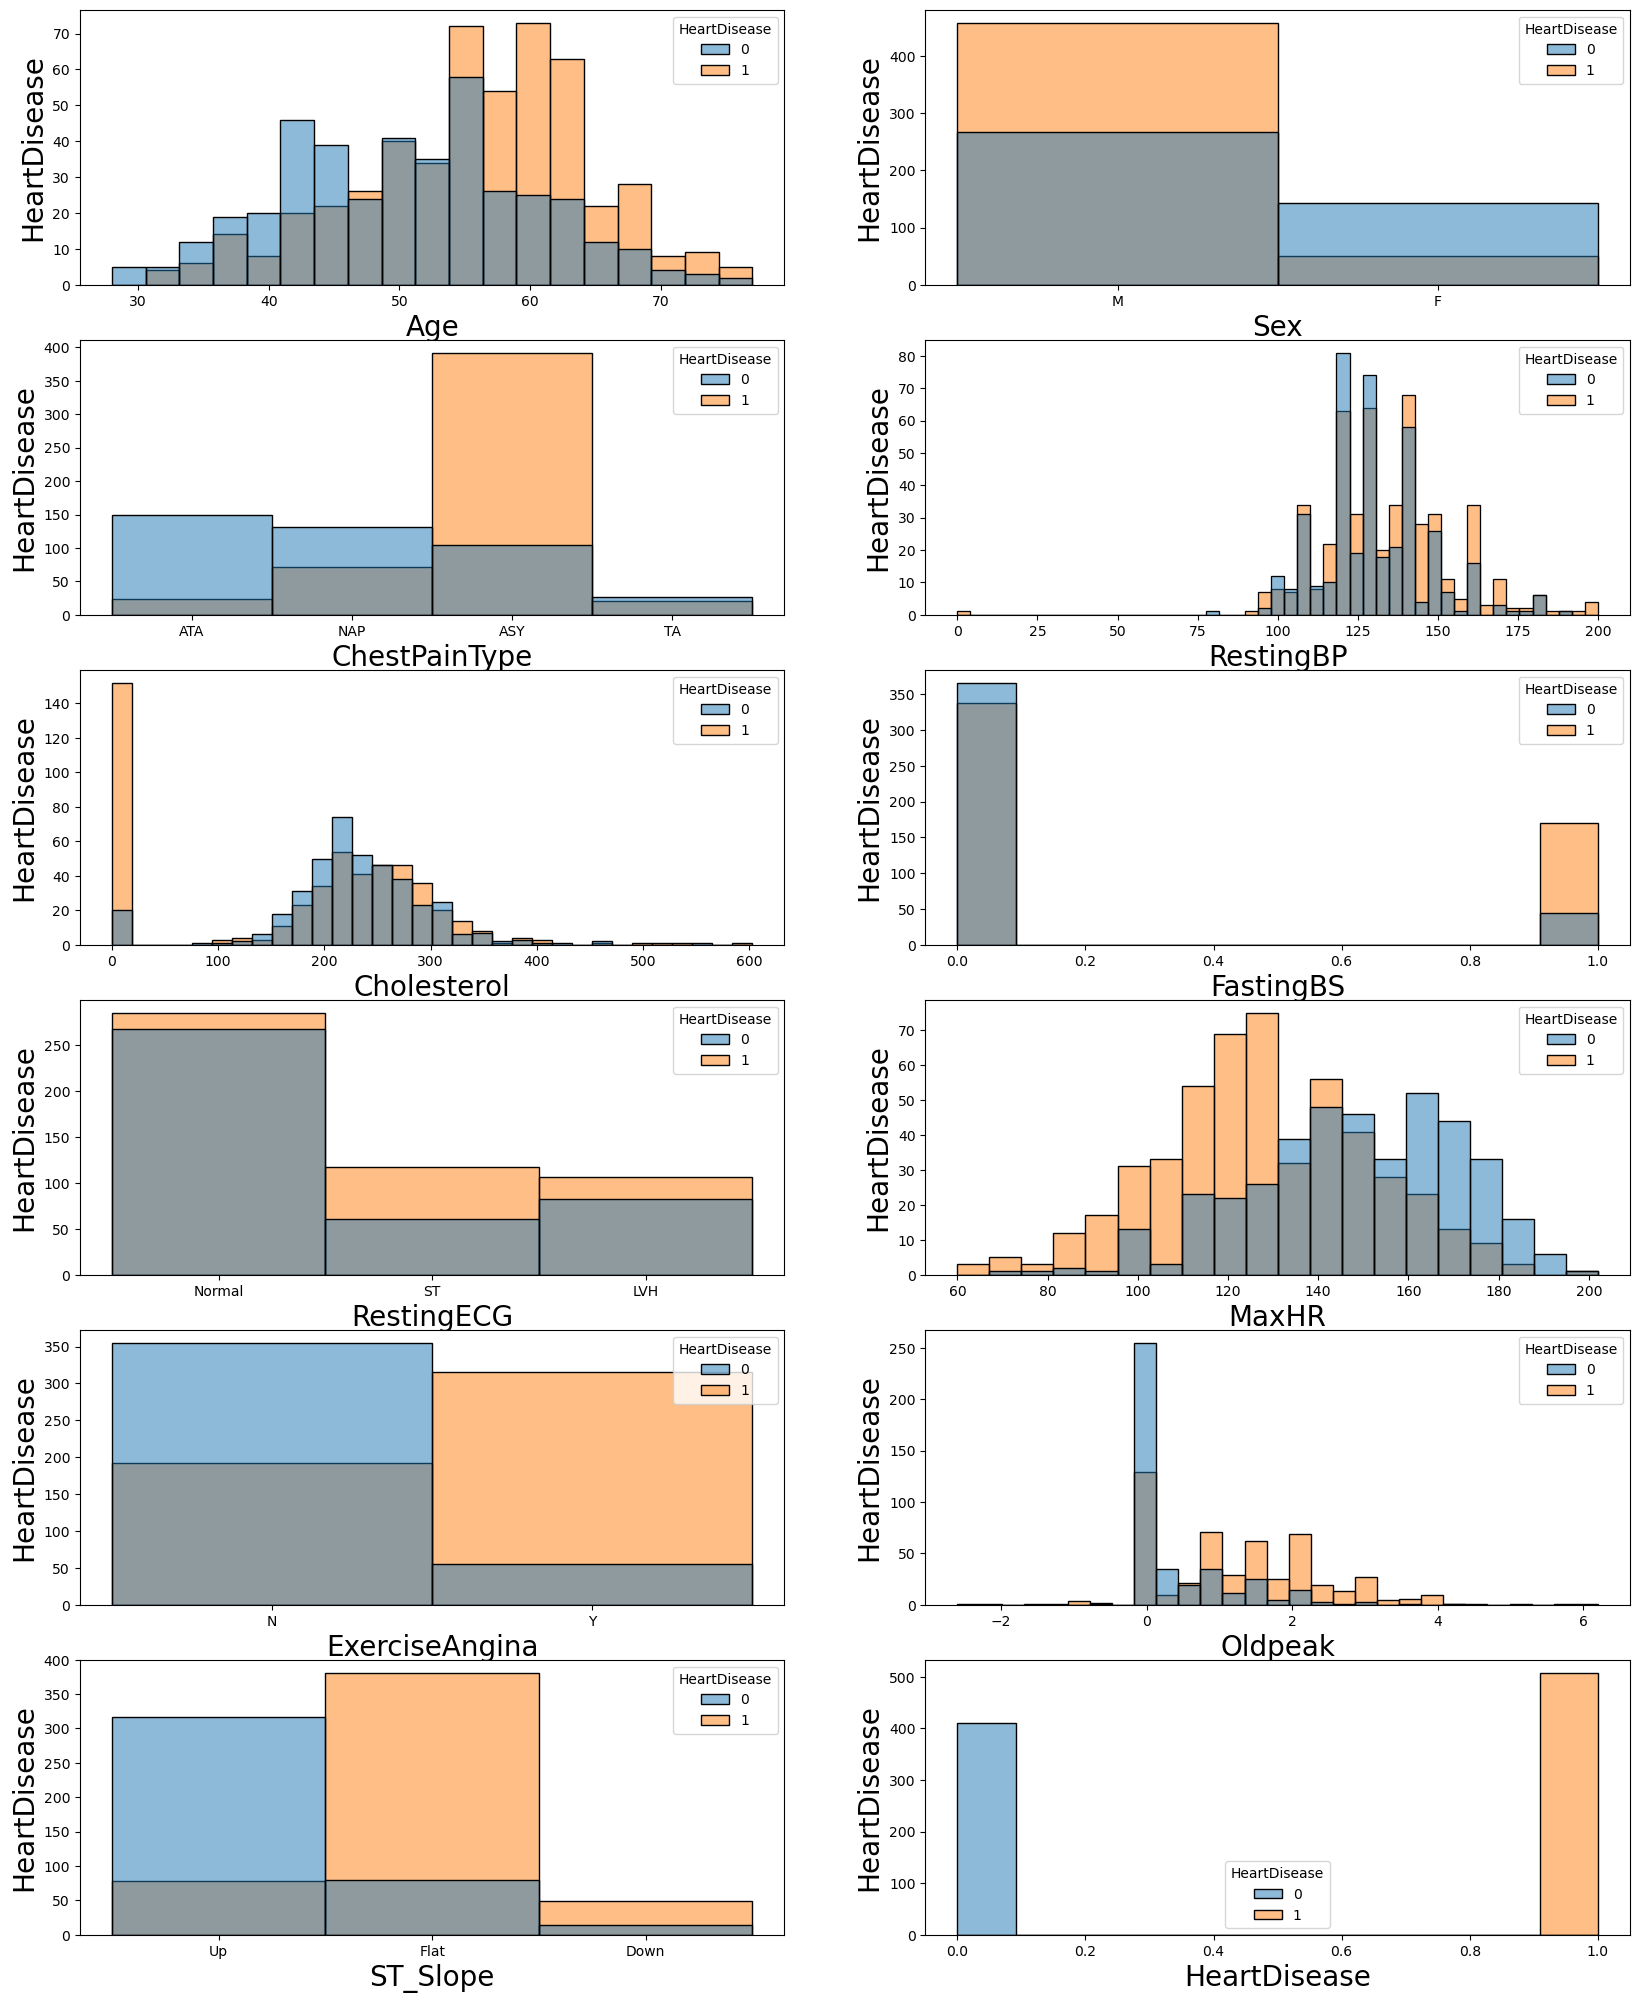

In [25]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in data.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(6,2,plotnumber)# plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column],hue=data.HeartDisease) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

### Insights:
- More than 55 years of aged people are most likely to be suffering from the heart disease.
- Male patients constitute the majority of population with the heart disease with high chance of getting it than the female.
- Chest pain type of ASY has more chance of getting heart disease and the chest pain type of TA has the least probability.
- Resting BP of more than 125 has more chance of getting heart disease and resting BP of around 100 to 125 has the least chance.
- cholesterol of more than 250 are more likely to get the disease and around 150 to 250 has the least probability of getting the disease
- Normal Resting ECG has the most probability to attain the disease followed by LVH.
- Max HR of around 65 to 80 is more dangerous as they can show poor cardiovascular fitness and hence more prone to the heart problem and MaxHR of more than 140 are least likely to attain the disease.
- Old peak of more than 0.5 are more likely to be at risk with coronary artery disease and less than 0.5 has the very least probability of getting the heart disease.
- ST slope of flat and down categories are more prone to the heart problem than the other category.

# Data preprocessing

### Checking for null values

In [26]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Checking for duplicate records: 

In [27]:
data.duplicated().sum()

0

### Conversion of categorical columns into numerical columns- Encoding


In [28]:
for column in data.columns:
        if data[column].dtype =='object':
            print(column)
        

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


### 1.Sex

### Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lb=LabelEncoder()
data.Sex=lb.fit_transform(data['Sex']) # 0-female, 1- male

In [31]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1


### 2.ChestPain Type

### Frequency encoding (using loc function to fetch the values and replacing it)

In [32]:
data.rename({'ChestPainType':'cpt'},axis=1,inplace=True)

In [33]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [34]:
data.cpt.value_counts()

cpt
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [35]:
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=0

In [36]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0
3,48,0,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0


### 3. RestingECG

In [37]:
data.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [38]:
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [39]:
data.tail(2)

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
916,57,0,1,130,236,0,1,174,N,0.0,Flat,1
917,38,1,2,138,175,0,2,173,N,0.0,Up,0


### 4. ExerciseAngina

In [40]:
data.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [41]:
data.ExerciseAngina=lb.fit_transform(data['ExerciseAngina']) #N-0, Y-1

In [42]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,Up,0
1,49,0,2,160,180,0,2,156,0,1.0,Flat,1
2,37,1,1,130,283,0,0,98,0,0.0,Up,0
3,48,0,3,138,214,0,2,108,1,1.5,Flat,1
4,54,1,2,150,195,0,2,122,0,0.0,Up,0


### 5. ST_Slope

In [43]:
data.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [44]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=2
data.loc[data['ST_Slope']=='Up','ST_Slope']=1
data.loc[data['ST_Slope']=='Down','ST_Slope']=0

In [45]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,1,0
1,49,0,2,160,180,0,2,156,0,1.0,2,1
2,37,1,1,130,283,0,0,98,0,0.0,1,0
3,48,0,3,138,214,0,2,108,1,1.5,2,1
4,54,1,2,150,195,0,2,122,0,0.0,1,0


### checking for constant columns 

In [46]:
for column in data.columns:
    if data[column].std()==0:
        print(column)          # hence no constant feature

## Feature scaling and handling outliers are not required in decision tree models, random forest and ensembling techniques that involve decision trees
-  Ensemble machine learning models, such as Random Forests and Gradient Boosting, are generally less sensitive to issues like feature scaling and outliers compared to some other types of models.
- Decision trees (building blocks of ensembles) are not influenced by the scale of features. Each split is based on a threshold for a single feature, and the scale of that feature doesn't affect the decision-making process.

#### Exceptions:

- If your ensemble includes models or components that are sensitive to feature scales (e.g., SVMs, k-NN), you might still want to consider scaling. However, for the ensemble as a whole, it's often less critical. 
- Models that rely on distances between data points like k-NN or SVM are influenced by feature scaling unlike these ensembling methods


### Checking outliers:


In [47]:
data.dtypes

Age                 int64
Sex                 int32
cpt                object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [48]:
data.head(2)

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,0,0.0,1,0
1,49,0,2,160,180,0,2,156,0,1.0,2,1


In [49]:
data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [50]:
# fetching only numerical columns
data.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [51]:
data.FastingBS.value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [52]:
# continuous features- Age, RestingBP, Cholestrol, MaxHR, Oldpeak
# discrete features- FastingBS, HeartDisease
data2= data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
data2

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


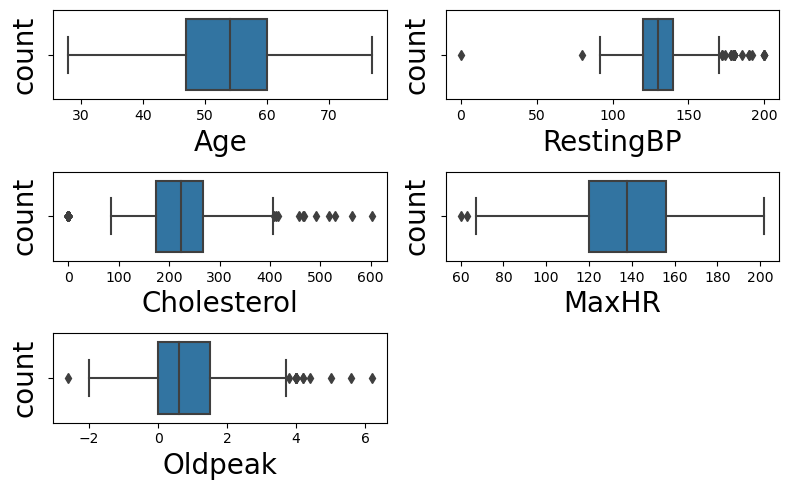

In [53]:
# boxplot for continuous features to check the outliers

plt.figure(figsize= (8, 5), facecolor = 'white')
plotnumber =1

for column in data2.columns:
    if plotnumber <=5:
        ax= plt.subplot(3, 2, plotnumber)
        sns.boxplot(data= data2, x= column)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('count', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

In [54]:
# RestingBP, cholesterol, MaxHR, Oldpeak are the features with outliers
# RestingBP, MaxHR- normal distributions hence emphirical rule
# Cholesterol and Oldpeak- skewed distributions hence iqr method

### 1. RestingBP 

In [55]:
mean= data['RestingBP'].mean()
std= data['RestingBP'].std()
lower_lim = mean -3*std
upper_lim = mean +3*std
print(f'lower limit is {lower_lim}')
print(f'upper limit is {upper_lim}')

lower limit is 76.85405180149661
upper limit is 187.93897652094347


In [56]:
data.loc[data['RestingBP'] < lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,2,155,0,1.5,2,1


In [57]:
data.loc[data['RestingBP'] > upper_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,1,1,190,241,0,2,106,0,0.0,1,0
241,54,1,3,200,198,0,2,142,1,2.0,2,1
365,64,0,3,200,0,0,2,140,1,1.0,2,1
399,61,1,2,200,0,1,0,70,0,0.0,2,1
592,61,1,3,190,287,1,1,150,1,2.0,0,1
732,56,0,3,200,288,1,1,133,1,4.0,0,1
759,54,1,1,192,283,0,1,195,0,0.0,1,1


In [58]:
data.loc[data['RestingBP'] < lower_lim, 'RestingBP']= np.mean(data['RestingBP'])

In [59]:
data.loc[data['RestingBP'] > upper_lim, 'RestingBP']= np.mean(data['RestingBP']) 

<Axes: xlabel='RestingBP'>

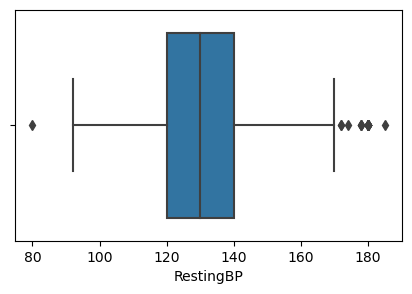

In [60]:
plt.figure(figsize= (5, 3))
sns.boxplot(data= data, x= 'RestingBP')

In [61]:
data.loc[data['RestingBP'] > upper_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [62]:
data.loc[data['RestingBP'] < lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


### 2. MaxHR 

In [63]:
mean= data['MaxHR'].mean()
std= data['MaxHR'].std()
lower_lim = mean -3*std
upper_lim = mean +3*std
print(f'lower limit is {lower_lim}')
print(f'upper limit is {upper_lim}')

lower limit is 60.42836577697024
upper limit is 213.19037060647202


In [64]:
data.loc[data['MaxHR'] < lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,1,3,140.0,0,0,2,60,0,0.0,2,1


In [65]:
data.loc[data['MaxHR'] > upper_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [66]:
data.loc[data['MaxHR'] < lower_lim, 'MaxHR']= np.mean(data['MaxHR'])

<Axes: xlabel='MaxHR'>

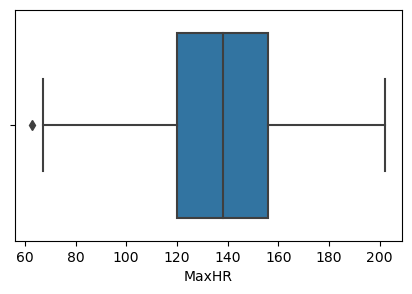

In [67]:
plt.figure(figsize= (5, 3))
sns.boxplot(data= data, x= 'MaxHR')

In [68]:
data.loc[data['MaxHR'] < lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


### 3. Cholesterol 

In [69]:
q1= data['Cholesterol'].quantile(0.25)
q3= data['Cholesterol'].quantile(0.75)
iqr= q3-q1
lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr
print(f'lower limit is {lower_lim}')
print(f'upper limit is {upper_lim}')

lower limit is 32.625
upper limit is 407.625


In [70]:
data.loc[data['Cholesterol'] <lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,3,115.0,0,0,2,93.0,1,0.0,2,1
294,32,1,0,95.0,0,1,2,127.0,0,0.7,1,1
295,61,1,3,105.0,0,1,2,110.0,1,1.5,1,1
296,50,1,3,145.0,0,1,2,139.0,1,0.7,2,1
297,57,1,3,110.0,0,1,0,131.0,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,3,122.0,0,0,2,120.0,0,0.5,1,1
515,63,1,2,130.0,0,1,0,160.0,0,3.0,2,0
518,48,1,2,102.0,0,1,0,110.0,1,1.0,0,1
535,56,1,3,130.0,0,0,1,122.0,1,1.0,2,1


In [71]:
data.loc[data['Cholesterol'] > upper_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,0,1,113.0,468,0,2,127.0,0,0.0,1,0
30,53,1,2,145.0,518,0,2,130.0,0,0.0,2,1
69,44,1,3,150.0,412,0,2,170.0,0,0.0,1,0
76,32,1,3,118.0,529,0,2,130.0,0,0.0,2,1
103,40,1,3,120.0,466,1,2,152.0,1,1.0,2,1
149,54,1,3,130.0,603,1,2,125.0,1,1.0,2,1
250,44,1,3,135.0,491,0,2,135.0,0,0.0,2,1
496,58,1,3,132.0,458,1,2,69.0,0,1.0,0,0
616,67,0,2,115.0,564,0,1,160.0,0,1.6,2,0
667,65,0,2,140.0,417,1,1,157.0,0,0.8,1,0


In [72]:
data.loc[data['Cholesterol'] <lower_lim, 'Cholesterol']= np.median(data['Cholesterol'])

In [73]:
data.loc[data['Cholesterol'] > upper_lim, 'Cholesterol'] = np.median(data['Cholesterol'])

<Axes: xlabel='Cholesterol'>

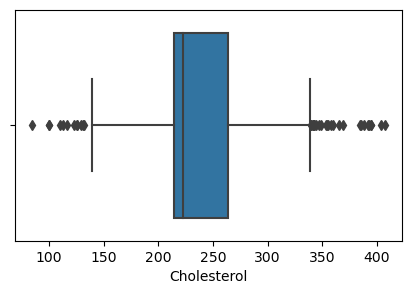

In [74]:
plt.figure(figsize= (5, 3))
sns.boxplot(data= data, x= 'Cholesterol')

In [75]:
data.loc[data['Cholesterol'] <lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [76]:
data.loc[data['Cholesterol'] > upper_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


### 4. Oldpeak 

In [77]:
q1= data['Oldpeak'].quantile(0.25)
q3= data['Oldpeak'].quantile(0.75)
iqr= q3-q1
lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr
print(f'lower limit is {lower_lim}')
print(f'upper limit is {upper_lim}')

lower limit is -2.25
upper limit is 3.75


In [78]:
data.loc[data['Oldpeak'] <lower_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,1,3,100.0,223,1,0,133.0,0,-2.6,2,1


In [79]:
data.loc[data['Oldpeak'] > upper_lim]

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,1,3,160.000000,246,0,0,82.0,1,4.0,2,1
166,50,1,3,140.000000,231,0,0,140.0,1,5.0,2,1
500,65,1,3,136.000000,248,0,2,140.0,1,4.0,0,1
521,61,1,3,120.000000,282,0,0,135.0,1,4.0,0,1
537,74,1,3,150.000000,258,1,0,130.0,1,4.0,0,1
559,64,1,3,134.000000,273,0,2,102.0,1,4.0,0,1
624,63,0,3,150.000000,407,0,1,154.0,0,4.0,2,1
702,59,1,0,178.000000,270,0,1,145.0,0,4.2,0,0
732,56,0,3,132.540737,288,1,1,133.0,1,4.0,0,1
771,55,1,3,140.000000,217,0,2,111.0,1,5.6,0,1


In [80]:
data.loc[data['Oldpeak'] <lower_lim, 'Oldpeak']= np.median(data['Oldpeak'])

In [81]:
data.loc[data['Oldpeak'] > upper_lim, 'Oldpeak'] = np.median(data['Oldpeak'])

<Axes: xlabel='Oldpeak'>

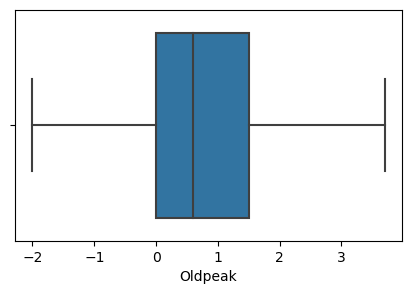

In [82]:
plt.figure(figsize= (5, 3))
sns.boxplot(data= data, x= 'Oldpeak')

### Scaling: 

In [83]:
data.columns

Index(['Age', 'Sex', 'cpt', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [84]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289,0,2,172.0,0,0.0,1,0
1,49,0,2,160.0,180,0,2,156.0,0,1.0,2,1
2,37,1,1,130.0,283,0,0,98.0,0,0.0,1,0
3,48,0,3,138.0,214,0,2,108.0,1,1.5,2,1
4,54,1,2,150.0,195,0,2,122.0,0,0.0,1,0


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]= scaling.fit_transform(data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [86]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.571429,0.633540,0,2,0.784173,0,0.350877,1,0
1,0.428571,0,2,0.761905,0.295031,0,2,0.669065,0,0.526316,2,1
2,0.183673,1,1,0.476190,0.614907,0,0,0.251799,0,0.350877,1,0
3,0.408163,0,3,0.552381,0.400621,0,2,0.323741,1,0.614035,2,1
4,0.530612,1,2,0.666667,0.341615,0,2,0.424460,0,0.350877,1,0


# Feature Selection


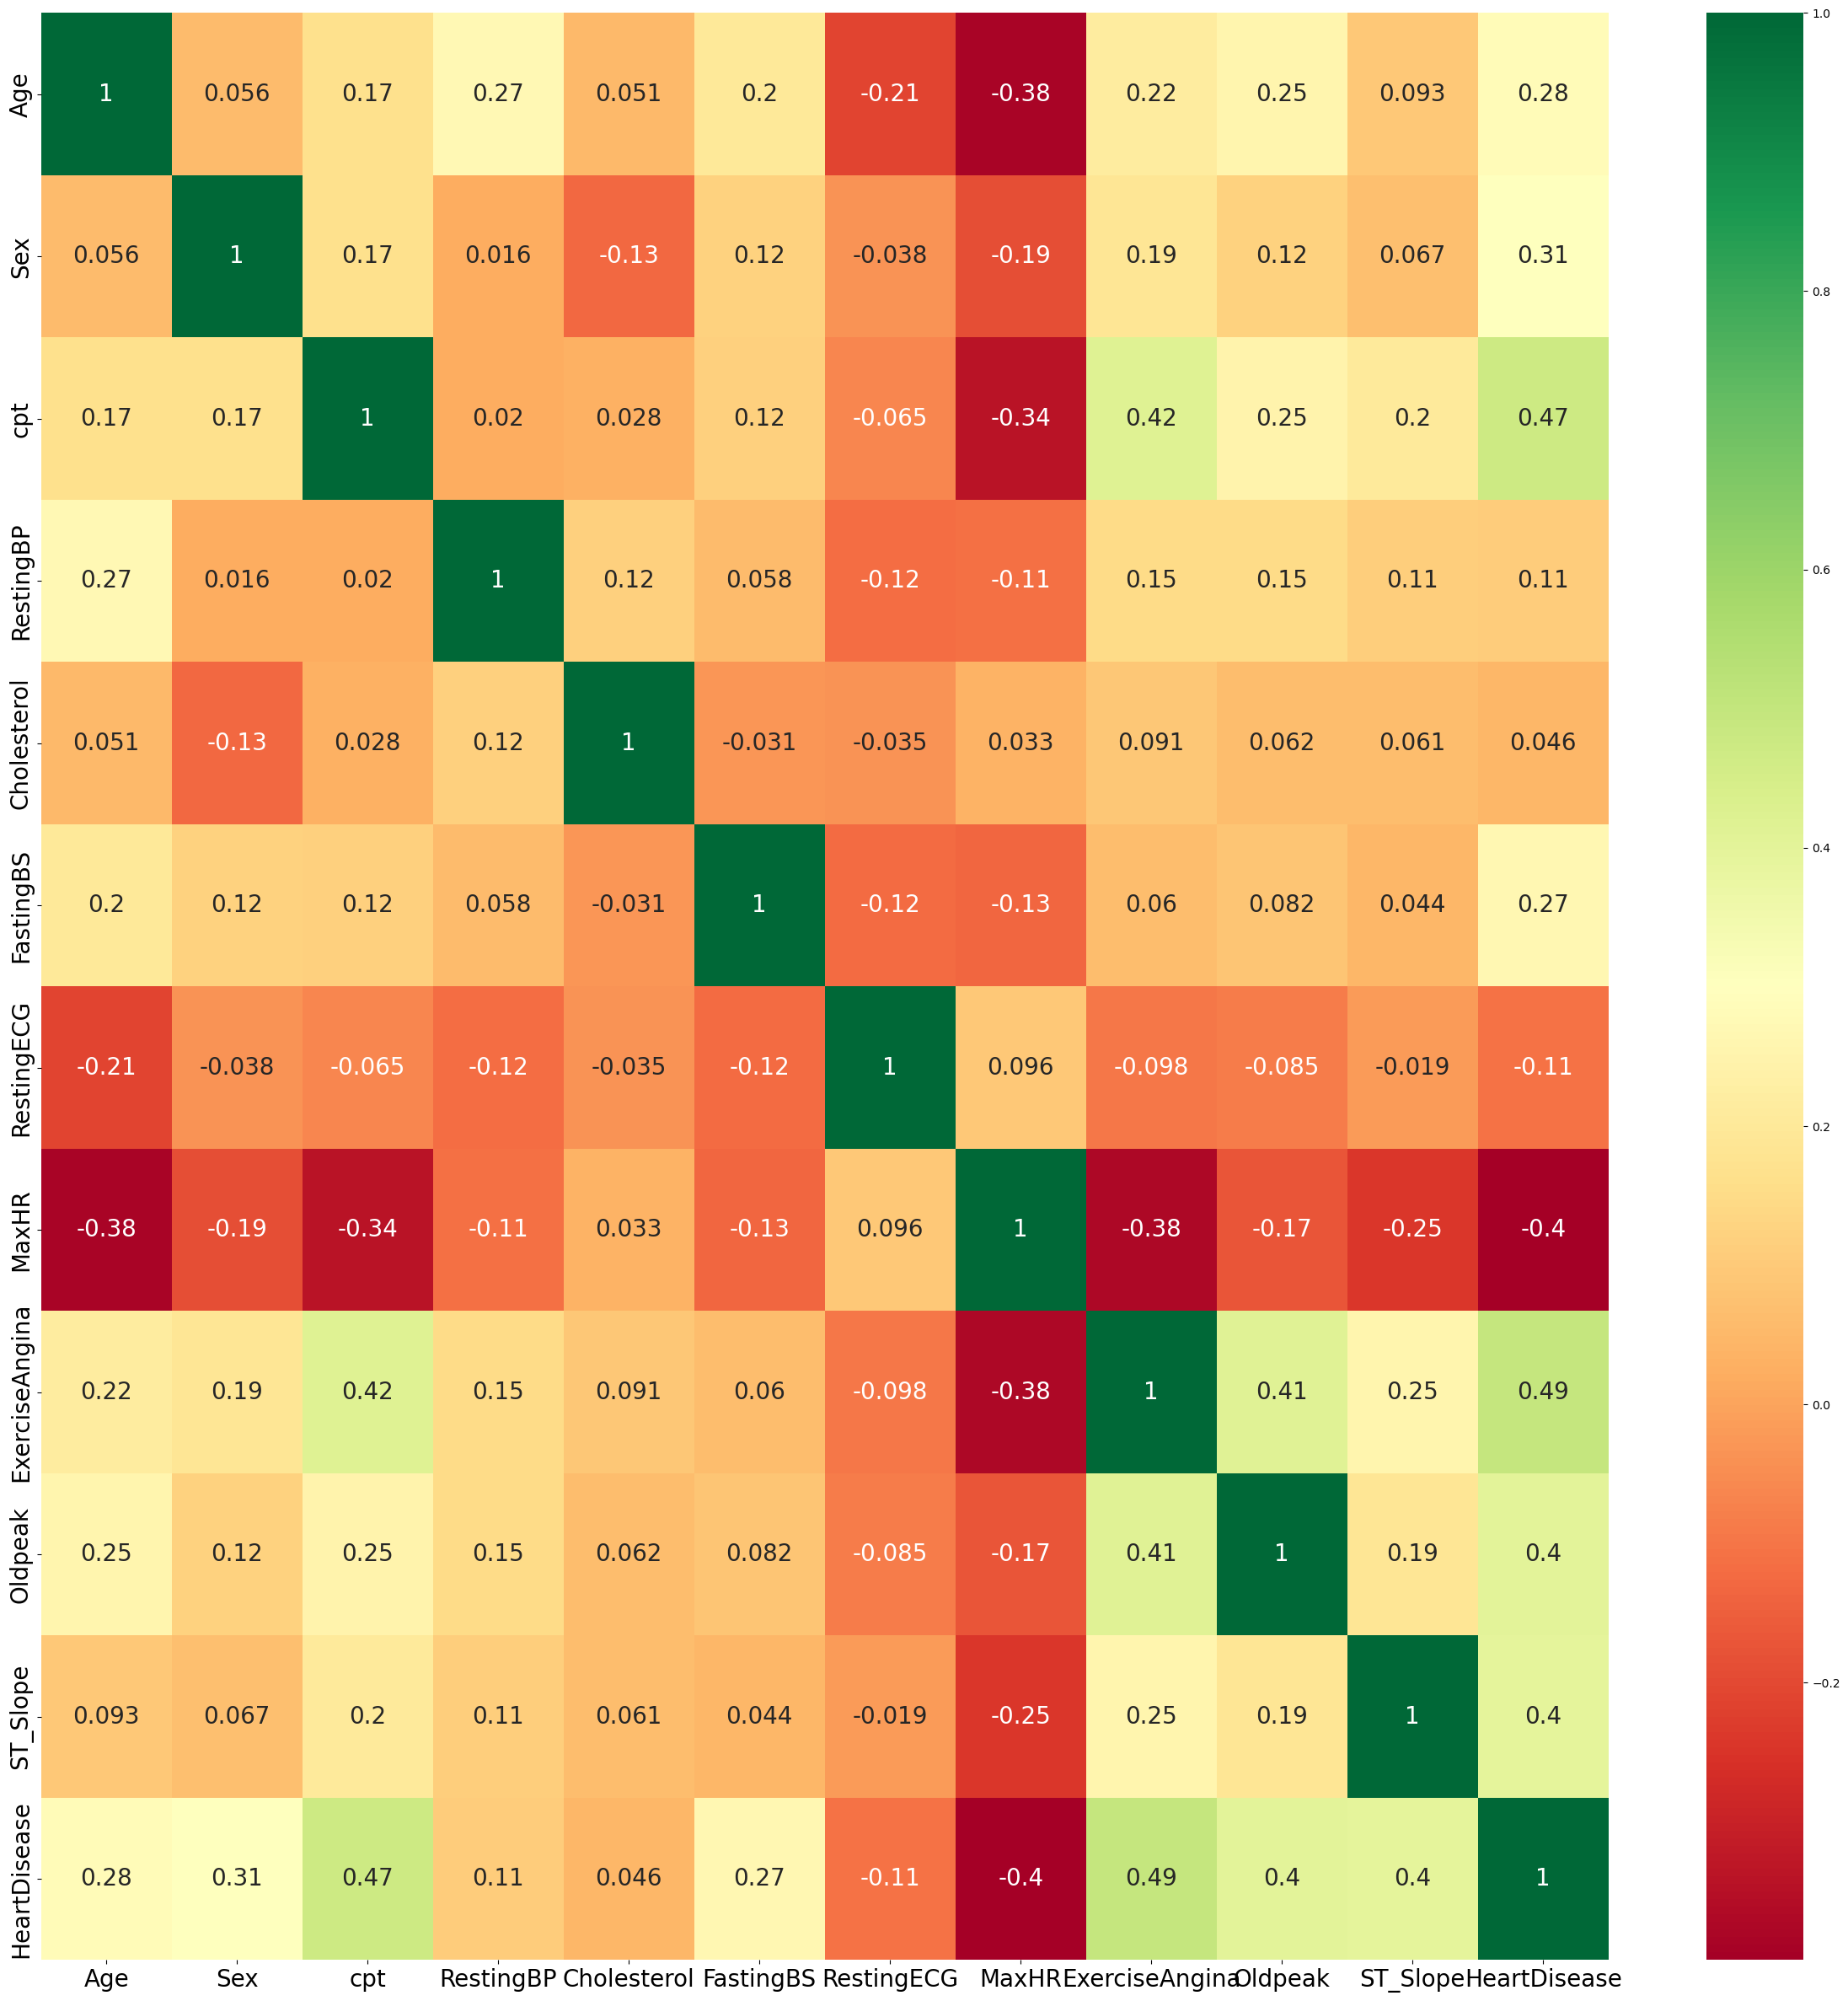

In [87]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":20})#plotting heat map to check correlation
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

# Model creation

### Splitting the data 

In [88]:
## creating X and y
X=data.drop('HeartDisease',axis=1)
y=data.HeartDisease#dependent variable or target 

In [89]:
X #calling x

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.571429,0.633540,0,2,0.784173,0,0.350877,1
1,0.428571,0,2,0.761905,0.295031,0,2,0.669065,0,0.526316,2
2,0.183673,1,1,0.476190,0.614907,0,0,0.251799,0,0.350877,1
3,0.408163,0,3,0.552381,0.400621,0,2,0.323741,1,0.614035,2
4,0.530612,1,2,0.666667,0.341615,0,2,0.424460,0,0.350877,1
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,0,0.285714,0.555901,0,2,0.496403,0,0.561404,2
914,0.816327,1,3,0.609524,0.335404,1,2,0.561151,0,0.947368,2
915,0.591837,1,3,0.476190,0.142857,0,2,0.374101,1,0.561404,2
916,0.591837,0,1,0.476190,0.468944,0,1,0.798561,0,0.350877,2


In [90]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [96]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [98]:
y_train.value_counts()

HeartDisease
1    382
0    306
Name: count, dtype: int64

#### Balancing the dataset: 

In [99]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [100]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_sm))

Counter({1: 382, 0: 306})
Counter({0: 382, 1: 382})


# what is Gradient Boosting ?
* Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [112]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation  #always give the default model first and check the score then only go for 
# hyperparameter tuning if required.
gbm.fit(X_train_sm,y_train_sm) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [113]:
## evaluating the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report, confusion_matrix# to check model performance
accu_score=accuracy_score(y_test,y_gbm)
accu_score

0.8956521739130435

In [114]:
confusion_matrix(y_test, y_gbm)

array([[ 93,  11],
       [ 13, 113]], dtype=int64)

### XGB


In [104]:
## Installing XGB library
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 469.7 kB/s eta 0:03:33
   ---------------------------------------- 0.1/99.8 MB 598.8 kB/s eta 0:02:47
   ---------------------------------------- 0.1/99.8 MB 610.6 kB/s eta 0:02:44
   ---------------------------------------- 0.2/99.8 MB 612.6 kB/s eta 0:02:43
   ---------------------------------------- 0.2/99.8 MB 590.8 kB/s eta 0:02:49
   ---------------------------------------- 0.2/99.8 MB 599.0 kB/s eta 0:02:47
   ---------------------------------------- 0.3/99.8 MB 630.2 kB/s eta 0:02:38
   --------------------

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 39 to 874
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             688 non-null    float64
 1   Sex             688 non-null    int32  
 2   cpt             688 non-null    object 
 3   RestingBP       688 non-null    float64
 4   Cholesterol     688 non-null    float64
 5   FastingBS       688 non-null    int64  
 6   RestingECG      688 non-null    object 
 7   MaxHR           688 non-null    float64
 8   ExerciseAngina  688 non-null    int32  
 9   Oldpeak         688 non-null    float64
 10  ST_Slope        688 non-null    object 
dtypes: float64(5), int32(2), int64(1), object(3)
memory usage: 59.1+ KB


In [ ]:
# even after encoding , the datatype of few independent features remains to be
# 'object', hence datatype is changed

In [115]:
X_train_sm.ST_Slope=X_train_sm.ST_Slope.astype('int64')
X_train_sm.RestingECG=X_train_sm.RestingECG.astype('int64')
X_train_sm.cpt=X_train_sm.cpt.astype('int64')

In [116]:
X_test.ST_Slope=X_test.ST_Slope.astype('int64')
X_test.RestingECG=X_test.RestingECG.astype('int64')
X_test.cpt=X_test.cpt.astype('int64')

In [117]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## object creation
xgb_c.fit(X_train_sm,y_train_sm)# fitting the data
y_hat=xgb_c.predict(X_test)#prediction

In [119]:
accuracy_score(y_test, y_hat)

0.8869565217391304

In [118]:
print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       104
           1       0.89      0.90      0.90       126

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [120]:
confusion_matrix(y_test, y_hat)

array([[ 90,  14],
       [ 12, 114]], dtype=int64)

In [122]:
# training accuracy
y_train_acc_xgb= xgb_c.predict(X_train_sm)
accuracy_score(y_train_sm, y_train_acc_xgb)

1.0

# Hyper parameter tuning in XG bost 

In [ ]:
https://www.youtube.com/watch?v=AvWfL1Us3Kg

For hyperparameter tuning

In [137]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200], # gamma specifies the minimum loss reduction to make a split.(prevents decision tree from growing deeper). It controls overfitting. Ranges from 0 to infinity
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7], # typical final values to be used: 0.01-0.3
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150], # no of models
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'subsample':[0.5, 0.7, 1],
              'colsample_bytree':[0.5, 0.7, 1]}

# other hyperparameters which could be tuned as follows:

# subsample= [0.5, 0.7, 1] 
# no of samples to be used. eg: 0.5, half (50%) of training data used to train each tree.
# lower values make the algorithm more conservative and prevents overfitting
# but too small values might lead to underfitting.
# Typical values : 0.5 to 1, Range : (0,1)

#colsample_bytree= [0.5, 0.7, 1]
# Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
# i.e., percentage of features to be taken for each tree.

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#n_estimators--number of decision tree
#scoring--->performance metric to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train_sm, y_train_sm) ##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best parameters: {cv_best_params}")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.2, 'n_estimators': 65, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [138]:
XGB2=XGBClassifier(subsample= 0.5, reg_lambda= 0, reg_alpha= 0.2, n_estimators=65, max_depth=11, learning_rate=0.1, gamma=0, colsample_bytree=0.7)
XGB2.fit(X_train_sm, y_train_sm)#training 
y_predict=XGB2.predict(X_test)#testing


In [139]:
accuracy_score(y_test, y_predict)

0.9043478260869565

In [140]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       104
           1       0.94      0.88      0.91       126

    accuracy                           0.90       230
   macro avg       0.90      0.91      0.90       230
weighted avg       0.91      0.90      0.90       230



In [141]:
confusion_matrix(y_test, y_predict)

array([[ 97,   7],
       [ 15, 111]], dtype=int64)

In [142]:
# training accuracy
y_train_acc_xgb2= XGB2.predict(X_train_sm)
accuracy_score(y_train_sm, y_train_acc_xgb2)

0.981675392670157

## XGBoost
### Pros
1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance (wins most of the Kaggle competitions)
8. Less prone to overfitting

### Cons
1. Difficult interpretation , visualization tough
2. Overfitting possible if parameters not tuned proper


![](def2.png)